In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Build SVM model with various kernels and select best kernel for given dataset.

In [2]:
import numpy as np
import pandas as pd
data=pd.read_csv('train.csv')
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [3]:
data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [6]:
data.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [7]:
data['activity_code'] = data.Activity.astype('category').cat.codes

In [8]:
data.activity_code

0       2
1       2
2       2
3       2
4       2
       ..
7347    5
7348    5
7349    5
7350    5
7351    5
Name: activity_code, Length: 7352, dtype: int8

In [9]:
data1=data.drop('Activity',axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 564 entries, tBodyAcc-mean()-X to activity_code
dtypes: float64(561), int64(1), int8(1), object(1)
memory usage: 31.6+ MB


In [11]:
x_col=data1.columns.to_list()
x_col.pop(-1)
x_data=data1[x_col]
y_col='activity_code'

In [12]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(data1[x_col],data1[y_col].values,test_size=0.1)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((6616, 562), (736, 562), (6616,), (736,))

In [13]:
# Build SVM model using svm.SVC with default parameters. Default kernel is rbl
from sklearn.svm import SVC
sv=SVC() #default kernel is 'rbl'
sv.fit(train_x,train_y)

SVC()

In [14]:
train_y_pred=sv.predict(train_x)
train_y_pred

array([0, 2, 1, ..., 3, 2, 0], dtype=int8)

In [15]:
test_y_pred= sv.predict(test_x)
test_y_pred

array([1, 0, 1, 3, 0, 4, 2, 0, 0, 5, 4, 0, 4, 5, 0, 1, 3, 3, 0, 0, 1, 2,
       3, 4, 1, 0, 2, 1, 2, 0, 1, 5, 4, 2, 5, 3, 3, 0, 0, 4, 3, 5, 4, 1,
       5, 1, 1, 2, 1, 4, 3, 3, 4, 0, 3, 4, 3, 3, 4, 4, 0, 1, 1, 2, 0, 0,
       1, 2, 1, 0, 1, 4, 2, 3, 0, 0, 3, 3, 3, 1, 5, 1, 0, 1, 2, 0, 1, 2,
       0, 1, 3, 3, 3, 1, 0, 0, 0, 2, 2, 5, 2, 5, 0, 0, 3, 2, 3, 1, 3, 0,
       5, 2, 2, 3, 3, 1, 5, 3, 0, 2, 4, 2, 2, 4, 2, 1, 2, 0, 3, 2, 3, 0,
       0, 0, 5, 3, 0, 3, 1, 3, 4, 4, 5, 4, 4, 4, 4, 2, 0, 2, 4, 0, 5, 4,
       4, 2, 3, 5, 1, 5, 1, 1, 1, 2, 0, 0, 3, 2, 1, 3, 2, 0, 5, 0, 2, 0,
       3, 0, 2, 3, 2, 2, 2, 2, 4, 1, 0, 1, 2, 4, 5, 0, 3, 2, 4, 5, 4, 3,
       5, 5, 2, 2, 0, 3, 5, 2, 2, 4, 0, 5, 1, 0, 4, 0, 2, 0, 1, 5, 5, 0,
       3, 0, 0, 2, 3, 4, 4, 5, 1, 4, 0, 1, 2, 0, 4, 0, 1, 4, 0, 5, 2, 4,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 5, 0, 2, 0, 2, 1, 3, 4, 0, 5, 1,
       2, 1, 5, 2, 4, 0, 3, 4, 4, 0, 2, 5, 2, 0, 2, 1, 0, 0, 2, 4, 4, 4,
       1, 5, 3, 2, 0, 2, 0, 3, 4, 5, 1, 2, 0, 5, 5,

In [16]:

print("Training Accuracy",accuracy_score(train_y,train_y_pred))
print("Testing Accuracy", accuracy_score(test_y,test_y_pred))

Training Accuracy 0.9558645707376058
Testing Accuracy 0.9538043478260869


In [17]:
## Metrics on testing data
accuracy_svc=accuracy_score(test_y,test_y_pred)
recall_svc=recall_score(test_y,test_y_pred,average='micro')
precision_svc=precision_score(test_y,test_y_pred,average='micro')
fscore_svc=f1_score(test_y,test_y_pred,average='micro')
model_score = pd.DataFrame(columns = ("index","Model","Accuracy",'Recall','Precision','fscore'))
model_score = model_score.append(pd.DataFrame({'index':[1],'Model':["NormalSVM"],'Accuracy':[accuracy_svc],'Recall':[recall_svc],'Precision':[precision_svc],'fscore':[fscore_svc]}))
model_score

,index,Model,Accuracy,Recall,Precision,fscore
0,1,NormalSVM,0.953804,0.953804,0.953804,0.953804


In [18]:

confusion_matrix_svc=confusion_matrix(test_y,test_y_pred,labels=[0,1,2,3,4,5])
confusion_matrix_svc

array([[156,   0,   0,   0,   0,   0],
       [  0, 108,  18,   0,   0,   0],
       [  0,  11, 139,   0,   0,   0],
       [  0,   0,   0, 115,   0,   2],
       [  0,   0,   0,   0,  91,   2],
       [  0,   0,   0,   1,   0,  93]], dtype=int64)

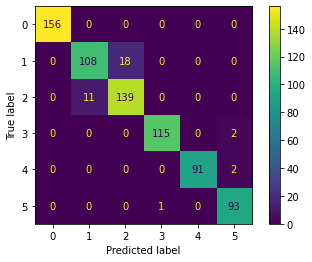

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_display_svc =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svc)

cm_display_svc.plot()
plt.show()

# Build SVM model using svm.SVC with Linear Kernel

In [21]:
from sklearn.svm import SVC
sv_1=SVC(kernel='linear')
sv_1.fit(train_x,train_y)

SVC(kernel='linear')

In [22]:
train_y_pred_1=sv_1.predict(train_x)
train_y_pred_1

array([0, 2, 1, ..., 3, 2, 0], dtype=int8)

In [23]:
test_y_pred_1= sv_1.predict(test_x)
test_y_pred_1

array([1, 0, 1, 3, 0, 4, 2, 0, 0, 5, 4, 0, 4, 5, 0, 1, 3, 3, 0, 0, 1, 1,
       3, 4, 1, 0, 2, 2, 2, 0, 1, 5, 4, 2, 5, 3, 3, 0, 0, 4, 3, 5, 4, 1,
       5, 1, 2, 2, 1, 4, 3, 3, 4, 0, 3, 4, 3, 3, 4, 4, 0, 1, 1, 2, 0, 0,
       1, 2, 1, 0, 1, 4, 2, 3, 0, 0, 3, 3, 3, 1, 5, 1, 0, 1, 2, 0, 1, 2,
       0, 1, 3, 3, 3, 1, 0, 0, 0, 2, 2, 5, 2, 5, 0, 0, 3, 2, 3, 1, 3, 0,
       5, 1, 2, 3, 3, 1, 5, 3, 0, 2, 4, 2, 2, 4, 2, 2, 1, 0, 3, 2, 3, 0,
       0, 0, 5, 3, 0, 3, 1, 3, 4, 4, 5, 4, 4, 4, 4, 2, 0, 2, 4, 0, 5, 4,
       4, 2, 3, 5, 1, 5, 2, 1, 1, 2, 0, 0, 3, 2, 1, 3, 1, 0, 5, 0, 2, 0,
       3, 0, 2, 3, 2, 2, 2, 2, 4, 1, 0, 1, 2, 4, 5, 0, 3, 2, 4, 5, 4, 3,
       5, 5, 2, 2, 0, 3, 5, 2, 2, 4, 0, 5, 1, 0, 4, 0, 1, 0, 1, 5, 5, 0,
       3, 0, 0, 2, 3, 4, 4, 5, 1, 4, 0, 1, 2, 0, 4, 0, 1, 4, 0, 5, 2, 4,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 5, 0, 2, 0, 1, 1, 3, 4, 0, 5, 1,
       2, 1, 5, 2, 4, 0, 3, 4, 4, 0, 2, 5, 2, 0, 2, 1, 0, 0, 2, 4, 4, 4,
       1, 5, 3, 2, 0, 1, 0, 3, 4, 5, 1, 2, 0, 5, 5,

In [24]:
print("Training Accuracy",accuracy_score(train_y,train_y_pred_1))
print("Testing Accuracy", accuracy_score(test_y,test_y_pred_1))

Training Accuracy 0.9944074969770254
Testing Accuracy 0.9850543478260869


In [25]:
accuracy_svc_1=accuracy_score(test_y,test_y_pred_1)
recall_svc_1=recall_score(test_y,test_y_pred_1,average='micro')
precision_svc_1=precision_score(test_y,test_y_pred_1,average='micro')
fscore_svc_1=f1_score(test_y,test_y_pred_1,average='micro')
model_score = model_score.append(pd.DataFrame({'index':[1],'Model':["LinearSVM"],'Accuracy':[accuracy_svc_1],'Recall':[recall_svc_1],'Precision':[precision_svc_1],'fscore':[fscore_svc_1]}))

In [26]:
model_score

,index,Model,Accuracy,Recall,Precision,fscore
0,1,NormalSVM,0.953804,0.953804,0.953804,0.953804
0,1,LinearSVM,0.985054,0.985054,0.985054,0.985054


In [27]:

confusion_matrix_svc_1=confusion_matrix(test_y,test_y_pred_1,labels=[0,1,2,3,4,5])
confusion_matrix_svc_1

array([[156,   0,   0,   0,   0,   0],
       [  0, 121,   5,   0,   0,   0],
       [  0,   6, 144,   0,   0,   0],
       [  0,   0,   0, 117,   0,   0],
       [  0,   0,   0,   0,  93,   0],
       [  0,   0,   0,   0,   0,  94]], dtype=int64)

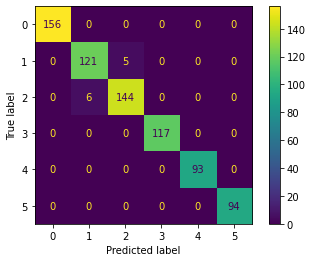

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_display_svc_1 =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svc_1)

cm_display_svc_1.plot()
plt.show()

# Build SVM model using svm.SVC with Polynomial kernel

In [29]:
sv_2=SVC(kernel='poly')
sv_2.fit(train_x,train_y)

SVC(kernel='poly')

In [30]:
train_y_pred_2=sv_2.predict(train_x)

In [31]:
test_y_pred_2= sv_2.predict(test_x)

In [32]:
print("Training Accuracy",accuracy_score(train_y,train_y_pred_2))
print("Testing Accuracy", accuracy_score(test_y,test_y_pred_2))

Training Accuracy 0.9569226118500604
Testing Accuracy 0.9646739130434783


In [33]:

confusion_matrix_svc_2=confusion_matrix(test_y,test_y_pred_2,labels=[0,1,2,3,4,5])
confusion_matrix_svc_2

array([[155,   0,   0,   1,   0,   0],
       [  0, 118,   8,   0,   0,   0],
       [  0,  10, 140,   0,   0,   0],
       [  0,   0,   0, 115,   0,   2],
       [  0,   0,   0,   2,  90,   1],
       [  0,   0,   0,   2,   0,  92]], dtype=int64)

In [34]:
accuracy_svc_2=accuracy_score(test_y,test_y_pred_2)
recall_svc_2=recall_score(test_y,test_y_pred_2,average='micro')
precision_svc_2=precision_score(test_y,test_y_pred_2,average='micro')
fscore_svc_2=f1_score(test_y,test_y_pred_2,average='micro')
model_score = model_score.append(pd.DataFrame({'index':[1],'Model':["PolySVM"],'Accuracy':[accuracy_svc_2],'Recall':[recall_svc_2],'Precision':[precision_svc_2],'fscore':[fscore_svc_2]}))

In [35]:
model_score

,index,Model,Accuracy,Recall,Precision,fscore
0,1,NormalSVM,0.953804,0.953804,0.953804,0.953804
0,1,LinearSVM,0.985054,0.985054,0.985054,0.985054
0,1,PolySVM,0.964674,0.964674,0.964674,0.964674


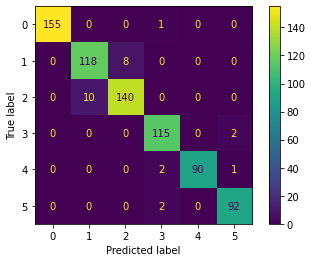

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_display_svc_2 =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svc_2)

cm_display_svc_2.plot()
plt.show()

# Build SVM model using svm.SVC with Sigmoid kernel
# 

In [37]:
sv_3=SVC(kernel='sigmoid')
sv_3.fit(train_x,train_y)

SVC(kernel='sigmoid')

In [38]:
train_y_pred_3=sv_3.predict(train_x)

In [39]:
test_y_pred_3= sv_3.predict(test_x)

In [40]:
print("Training Accuracy",accuracy_score(train_y,train_y_pred_3))
print("Testing Accuracy", accuracy_score(test_y,test_y_pred_3))

Training Accuracy 0.36925634824667475
Testing Accuracy 0.3641304347826087


In [41]:
accuracy_svc_3=accuracy_score(test_y,test_y_pred_3)
recall_svc_3=recall_score(test_y,test_y_pred_3,average='micro')
precision_svc_3=precision_score(test_y,test_y_pred_3,average='micro')
fscore_svc_3=f1_score(test_y,test_y_pred_3,average='micro')
model_score = model_score.append(pd.DataFrame({'index':[1],'Model':['SigmoidSVM'],'Accuracy':[accuracy_svc_3],'Recall':[recall_svc_3],'Precision':[precision_svc_3],'fscore':[fscore_svc_3]}))
model_score

,index,Model,Accuracy,Recall,Precision,fscore
0,1,NormalSVM,0.953804,0.953804,0.953804,0.953804
0,1,LinearSVM,0.985054,0.985054,0.985054,0.985054
0,1,PolySVM,0.964674,0.964674,0.964674,0.964674
0,1,SigmoidSVM,0.364130,0.364130,0.364130,0.364130


In [42]:
confusion_matrix_svc_3=confusion_matrix(test_y,test_y_pred_3,labels=[0,1,2,3,4,5])
confusion_matrix_svc_3

array([[115,   0,   0,  41,   0,   0],
       [ 59,  13,  12,  42,   0,   0],
       [ 67,  13,  23,  47,   0,   0],
       [ 33,   0,   1,  77,   4,   2],
       [ 16,   0,   2,  42,  33,   0],
       [ 30,   0,   0,  54,   3,   7]], dtype=int64)

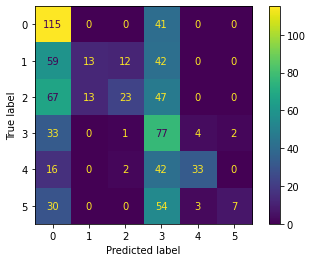

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_display_svc_3 =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svc_3)

cm_display_svc_3.plot()
plt.show()

# Build SVM model using svm.SVC with Sigmoid kernel and gamma as auto

In [44]:
sv_4=SVC(kernel='sigmoid',gamma='auto')
sv_4.fit(train_x,train_y)

SVC(gamma='auto', kernel='sigmoid')

In [45]:
train_y_pred_4=sv_4.predict(train_x)
test_y_pred_4= sv_4.predict(test_x)

In [46]:
print("Training Accuracy",accuracy_score(train_y,train_y_pred_4))
print("Testing Accuracy", accuracy_score(test_y,test_y_pred_4))

Training Accuracy 0.3724304715840387
Testing Accuracy 0.3641304347826087


In [47]:
accuracy_svc_4=accuracy_score(test_y,test_y_pred_4)
recall_svc_4=recall_score(test_y,test_y_pred_4,average='micro')
precision_svc_4=precision_score(test_y,test_y_pred_4,average='micro')
fscore_svc_4=f1_score(test_y,test_y_pred_4,average='micro')
model_score = model_score.append(pd.DataFrame({'index':[1],'Model':['SigmoidautoSVM'],'Accuracy':[accuracy_svc_4],'Recall':[recall_svc_4],'Precision':[precision_svc_4],'fscore':[fscore_svc_4]}))
model_score

,index,Model,Accuracy,Recall,Precision,fscore
0,1,NormalSVM,0.953804,0.953804,0.953804,0.953804
0,1,LinearSVM,0.985054,0.985054,0.985054,0.985054
0,1,PolySVM,0.964674,0.964674,0.964674,0.964674
0,1,SigmoidSVM,0.364130,0.364130,0.364130,0.364130
0,1,SigmoidautoSVM,0.364130,0.364130,0.364130,0.364130


In [48]:
confusion_matrix_svc_4=confusion_matrix(test_y,test_y_pred_4,labels=[0,1,2,3,4,5])
confusion_matrix_svc_4

array([[115,   0,   0,  41,   0,   0],
       [ 59,  13,  12,  42,   0,   0],
       [ 67,  13,  23,  47,   0,   0],
       [ 33,   0,   1,  77,   4,   2],
       [ 16,   0,   2,  42,  33,   0],
       [ 28,   0,   1,  55,   3,   7]], dtype=int64)

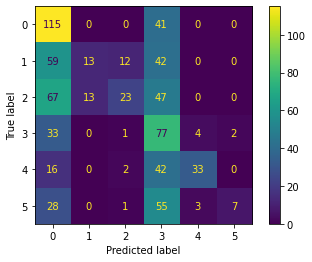

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm_display_svc_4 =ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svc_4)

cm_display_svc_4.plot()
plt.show()

In [50]:
##final comparison between kernels and svm models
model_score

,index,Model,Accuracy,Recall,Precision,fscore
0,1,NormalSVM,0.953804,0.953804,0.953804,0.953804
0,1,LinearSVM,0.985054,0.985054,0.985054,0.985054
0,1,PolySVM,0.964674,0.964674,0.964674,0.964674
0,1,SigmoidSVM,0.364130,0.364130,0.364130,0.364130
0,1,SigmoidautoSVM,0.364130,0.364130,0.364130,0.364130


In [51]:
print("Therefore LinearSVM is best among the kernels with accuracy of 0.983696.")

Therefore LinearSVM is best among the kernels with accuracy of 0.983696.
